# (1) Bag of Words
Bag of Words는 자연어 처리(Natural Language Processing)나 정보 검색(Information Retrieval)에서 쓰이는 매우 간단한 단어 표현 방법으로,     
문서 내의 단어들의 분포를 보고 이 문서의 특성을 파악하는 기법입니다. 줄여서 간단히 BoW라고 표기하기도 합니다.
* Bag of Words는 중복을 제거하지 않고, 단어들을 카운트
* Bag of Words는 단어들의 순서는 무시하고, 단어들의 빈도 정보는 그대로 보존
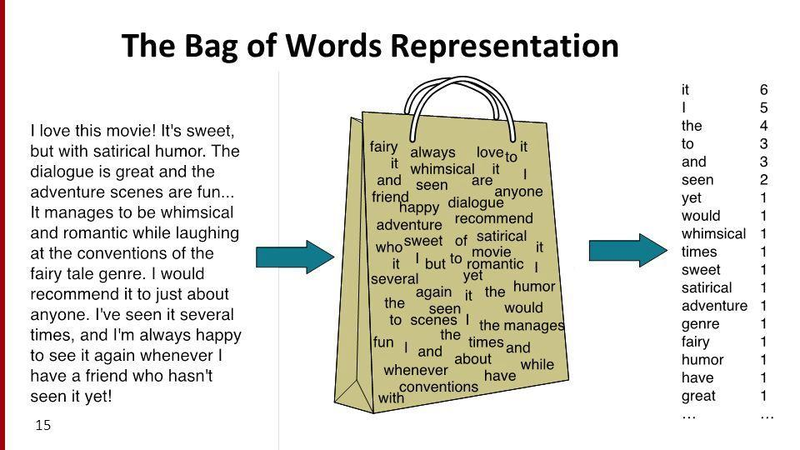

## BOW 의 예제
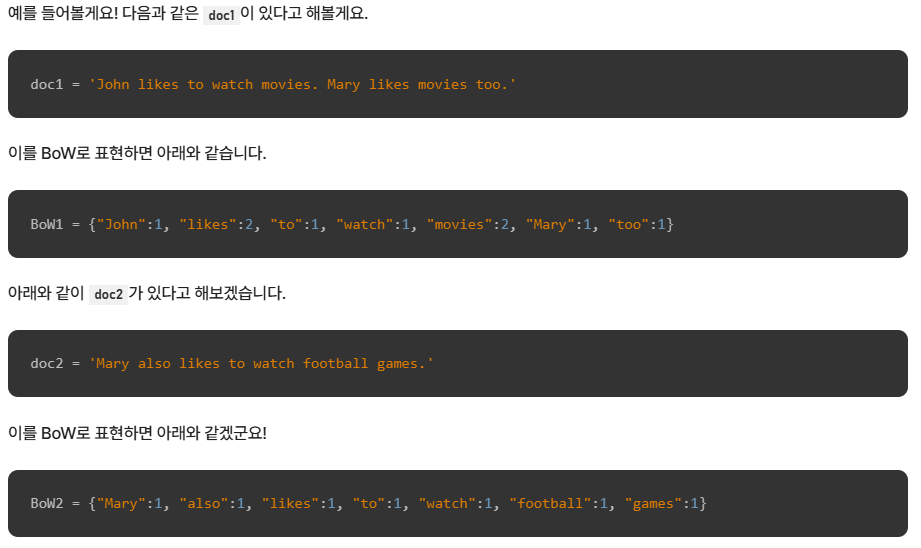

위의 BoW에서 각 key는 단어, 각 value는 각 단어가 주어진 문서에 등장한 횟수이며 문서 내 단어의 순서는 중요하지 않다.    
그로인해 아래의 BoW는 BoW1과 본질적으로 동일하다.     
BoW 방식으로 문장을 벡터화 한다면 `i ate lunch`와 `Lunch ate i.` 는 같은 문장이 된다.    
이렇게 **어순에 따라 달라지는 의미를 반영하지 못해 BoW는 한계를 가진다.**

# (2) Bag of Words 구현해보기
## 단어장의 의미 살펴보기
단어장(Vocabulary)은  문헌에 따라 사전 또는 단어 집합이라고 불리며 중복을 제거한 단어들의 집합을 뜻한다.    
단어장이라는 개념은 Bag of Words를 위해 사용되는 개념이라기보다는, 자연어 처리에서 보편적으로 쓰이는 용어이다.    
단어장을 강조하는 이유는 지금부터 사용할 `DTM(Document-Term Matrix)` 이라는 개념 이해를 돕기 위해서이다.
* Bag of Words랑은 다른 개념으로 아래의 예제에서 Vicabulary를 사용하여 갯수를 확인해보자.

## keras Tokenizer 활용
케라스 토크나이저를 통해 Bag of Words를 만들어보기

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


## scikit-learn CountVectorizer 활용
Bag of Words를 만드는 또 다른 방법은 사이킷런의 CountVectorizer를 사용하는 것

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


**CounterVectorizer**의 vector.fit_transform(입력 문장).toarray()으로 출력되는 Bag of Words 결과를 보면    
각 단어의 빈도만 출력될 뿐, 어떤 단어의 빈도인지는 나오지 않습니다.    
이는 vector.vocabulary_를 통해서 각 단어에 부여된 인덱스를 확인이 가능하며 주의할 점은 인덱스는 0부터 시작한다는 점    
CountVectorizer의 단어장은 `len(vector.vocabulary_)`를 사용하여 구한다.

In [3]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


## (3) DTM과 코사인 유사도
DTM(Document-Term Matrix) 은 직역하면 문서-단어 행렬이다.    
DTM은 여러 문서의 Bag of words를 하나의 행렬로 구현한것으로 DTM은 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합한다.    
DTM은 문서를 행으로 단어를 열로 가지는 행렬이지만 문헌에 따라서는 열을 문서로 단어를 행으로해 TDM(Term-Document Matrix)라고 부르기도 한다.

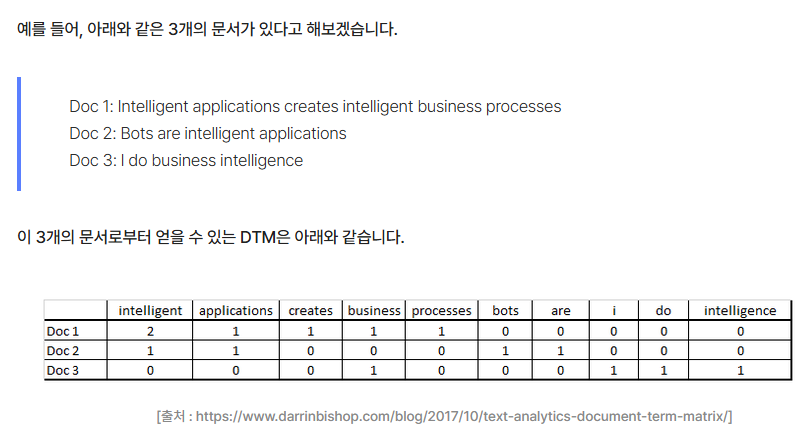

위의 DTM을 보면 각 행은 각 문서를 나타내고 있다.    
각 열은 문서 3개의 통합 단어장(Vocabuary)에 있는 단어들로 구성되어 있고     
이렇게 구성하면 앞서 문서 1개로 BoW를 만들었을 때와는 달리, 각 행에는 0이 많이 포함된다.    
이때 각 행을 `문서 벡터(document vector)`, 열을 `단어 벡터(word vector)`라고 부를 수 있다.    
 문서의 수가 많아지면 많아질수록, 통합 단어장의 크기도 커지게 되어서 DTM은 결국 문서 벡터와 단어 벡터 모두 대부분의 값이 0이 되는 성질을 가지고 있다.

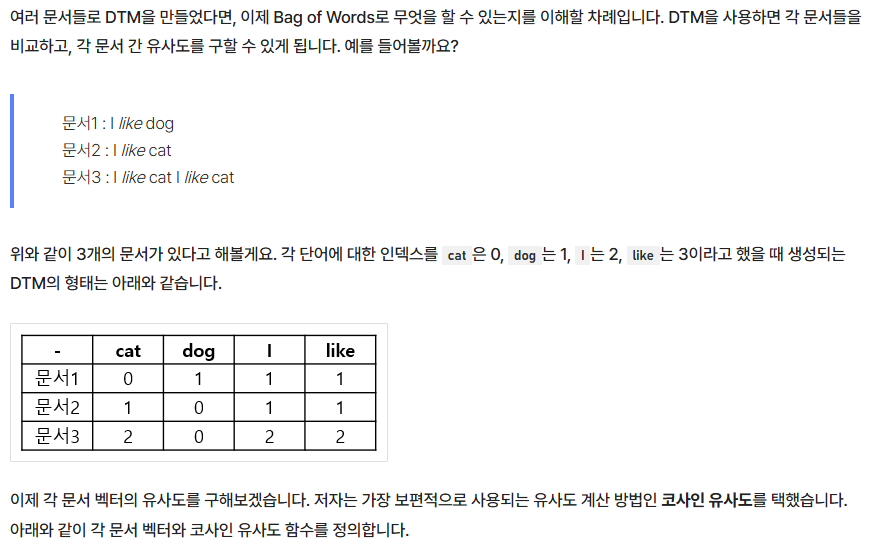

In [4]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

코사인 유사도는 자연어 처리에서 전반적으로 사용되는 개념으로 제대로 숙지하는것이 좋다.    
코사인 유사도 (Cosine Similarity) : https://wikidocs.net/24603    
DTM에서 코사인 유사도는 0 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있다.    

In [5]:
# 문서1, 문서2, 문서3의 각 문서 벡터에 대해서 코사인 유사도를 계산해 보기
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


**한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1**이 되기 때문에 문서2와 문서3의 코사인 유사도가 1이 나온다.

# (4) DTM의 구현과 한계점
## scikit-learn CountVectorizer 활용
* 3개의 문서에 대해서 DTM을 만드는 과정

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## DTM의 한계점
DTM은 bag of words 기반으로 문서를 비교할 수 있는 행렬로 DTM은 두 가지 한계점을 지닌다.
1. DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있다.
2. 단어의 빈도에만 집중하는 방법 자체의 한계이다.
* 예시 : 영어 데이터를 가지고 DTM을 만들었을 때 불용어 'the'는 어떤 문서에서도 자주 등장하는 경향이 있다.
* 이때 문서1과 문서2에서 둘 다 'the'가 많이 등장했다고 하여 이 두 문서가 유사한 문서라고 볼 수 없다.
* 중요한 단어와 중요하지 않은 단어에 가중치를 따로 구분하지 않기 때문이다.

# (5) TF-IDF
## TF-IDF (Term Frequency-Inverse Document Frequency)
* 각 단어의 중요도를 판단하여 가중치를 주는 방법
* 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것
* 한국어로 해석하면 '단어 빈도-역문서 빈도'로 단어의 빈도' 와 '문서의 빈도의 역수' 를 활용하는것 같다.
* 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점
* TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용해야 한다.
* **DTM은 TF행렬이고 DTM의 단어에 IDF값을 곱하면 TF-IDF 행렬이 된다.**

## TF-IDF 계산하기
* 수식
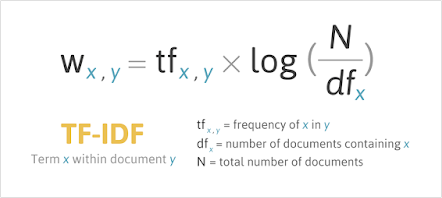

위의 이미지는 y는 문서, x는 단어라고 할 때 TF-IDF의 수식을 보여주며 TF는 각 문서에 등장하는 단어의 빈도를 의미하므로 DTM을 만들면 자연스럽게 해결된다.    
위의 수식에서 TF 뒤에 곱해지는 log항이 IDF이며 역문서 빈도인 IDF는 전체 문서 수를 해당 단어가 포함된 문서 수로 나눈 비율의 로그이다.

# (6) TF-IDF 구현하기

In [7]:
# 필요한 도구를 임포트
from math import log
import pandas as pd
print('=3')

=3


In [9]:
# 3개의 문서 사용
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]
print('=3')

=3


In [10]:
# 3개의 단어들이 모두 들어간 통합 단어장 만들기
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


* 중복을 제거한 단어들의 개수가 13개
* 총 문서의 수를 변수 N에다가 저장

In [11]:
N = len(docs) # 총 문서의 수
N

3

In [12]:
# TF 함수, IDF 함수, TF-IDF 함수를 만들기

def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

여기서 IDF를 실제 구현할 때는 앞서 배운 식과는 다소 다른 식을 사용했다.     
실제로 많은 파이썬 패키지들이 앞에서 배운 식에서 조금씩 조정된, 서로 다른 식을 사용한다.      
특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위해 $log$항의 분모에 1을 더해주고 (Bag of Words를 사용할 때 일반적인 상황은 아님)    
$log$항에 1을 더해주기, 이는 $log$항의 분자 분모값이 동일한경우 $log$의 진수가 1이 됨에 따라 IDF의 값이 0이 되는것을 방지함

In [13]:
# TF 함수를 사용하여 DTM을 만들기
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [14]:
# 각 단어의 IDF
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


IDF는 'likes'나 'to' 그리고 'watch'와 같이 모든 문서에 등장한 단어가 가장 낮은 값을 가진다.    
두 개의 문서에 등장한 'Mary'가 그다음으로 낮은 값이며 1개의 문서에만 등장한 단어들은 높은 값을 가진다.

In [15]:
# TF-IDF 행렬을 출력
# DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값

result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용
사이킷런에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidfVectorizer를 제공한다.    
이번에 배운 기본식에서 조정된 식을 사용한다.     
위에서 파이썬으로 구현한 식에서 더 나아가 $log$ 항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다르다.

In [16]:
# 사이킷런의 TfidfVectorizer를 통해 TF-IDF 행렬을 출력
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


# 학습정리

**Bag of Words**
문서 내의 단어들의 분포를 보고 이 문서의 특성을 파악하는 기법으로    
순에 따라 달라지는 의미를 반영하지 못해 BoW는 한계를 가진다.    
    
**단어장의 의미**
문헌에 따라 사전 또는 단어 집합이라고 불리며 중복을 제거한 단어들의 집합    
자연어 처리에서 보편적으로 쓰이는 용어이다.    
    
**DTM**
문서-단어 행렬로 여러 문서의 Bag of words를 하나의 행렬로 구현한것으로    
DTM은 각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합한다.    
문헌에 따라서는 열을 문서로 단어를 행으로해 TDM(Term-Document Matrix)라고 부르기도 한다.    
    
**코사인 유사도**    
두 벡터 간의 코사인 각도를 방향이 얼마나 유사한지를 나타내는 측정 지표이며    
두 벡터의 방향이 완전히 동일한 경우에는 1의 값, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게된다.    
코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 할 수 있다.    
    
**DTM의 한계점**    
1. DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있다.    
2. 단어의 빈도에만 집중하는 방법 자체의 한계이다.    
    
**TF-IDF**    
각 단어의 중요도를 판단하여 가중치를 주는 방법으로    
모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하고    
특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단한다.    
TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다.    
DTM은 TF행렬이고 DTM의 단어에 IDF값을 곱하면 TF-IDF 행렬이 된다.    